# チュートリアルの例
小さなデータセットに対する多項式曲線フィッティング問題の類推として、基本的な概念や用語を学ぶことができる。

## 1-2-1 人工データ


tはtarget,xはinput variableとする。実軸上の連続値をとるとする。データ数はNで、$x_1$,...,$x_N$それぞれに対し$t_1$,..,$t_N$が対応する。未知の$x$に対しできるだけ高い$t$の予測を行うというのがタスクである。

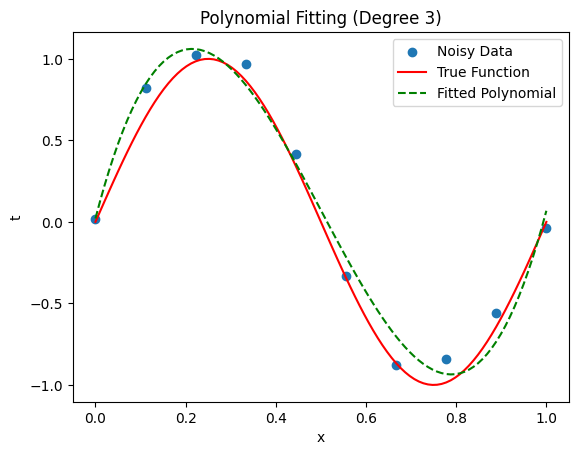

In [10]:
import torch
import matplotlib.pyplot as plt
import numpy as np

N = 10
p = 100
x = torch.linspace(0, 1, N)
x_p = torch.linspace(0, 1, p)
t_true = torch.sin(2 * np.pi * x_p)
t = torch.sin(2 * np.pi * x) + torch.randn(N) * 0.1

# Fit a polynomial using Torch
degree = 3
X = torch.stack([x**i for i in range(degree + 1)], dim=1)
coeff, _ = torch.lstsq(t.unsqueeze(1), X)
coeff = coeff.squeeze()

# Create the polynomial function
def polynomial(x):
    return sum(coeff[i] * x**i for i in range(degree + 1))

# Plot the data points, true function, and fitted polynomial
plt.scatter(x, t, label="Noisy Data")
plt.plot(x_p, t_true, label="True Function", color="red")
plt.plot(x_p, polynomial(x_p), label="Fitted Polynomial", linestyle="--", color="green")
plt.xlabel("x")
plt.ylabel("t")
plt.title(f"Polynomial Fitting (Degree {degree})")
plt.legend()
plt.show()